Przeprowadź podstawową eksplorację danych, taką jak wyświetlenie kilku pierwszych wierszy danych, informacje o kolumnach itp.
 • Przygotuj dane do budowy modeli klasyfikacji. 
 • Zbuduj klasyfikator k-najbliższych sąsiadów (KNN) do klasyfikacji gatunków irysów. 
 • Oceń jakość klasyfikatora za pomocą różnych metryk, takich jak dokładność, precyzja, czułość i specyficzność.
  • Zinterpretuj wyniki i zidentyfikuj najlepszy model.

In [11]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import pandas as pd

from sieci_zlozone.dane import file_path

data = load_iris()
X = data.data 
Y = data.target 

print("Kształt danych", X.shape)
print("Nazwy kolumn (cech):")
print(data.feature_names)
print("Piersze wartości\n", X[:5])
feature_names = data.feature_names
target_names = data.target_names

Kształt danych (150, 4)
Nazwy kolumn (cech):
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Piersze wartości
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [13]:
#do pandas i otrzymywanie informacji
df = pd.DataFrame(X, columns=feature_names)
df['target'] = Y
df['species'] = pd.Categorical.from_codes(df['target'], target_names)

print("Krok 2: Podstawowa eksploracja danych:")
print("\nPierwsze 5 wierszy danych Iris:")
print(df.head())

print("\nInformacje o kolumnach:")
print(df.info())

print("\nPodstawowe statystyki opisowe:")
print(df.describe())

Krok 2: Podstawowa eksploracja danych:

Pierwsze 5 wierszy danych Iris:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target species  
0       0  setosa  
1       0  setosa  
2       0  setosa  
3       0  setosa  
4       0  setosa  

Informacje o kolumnach:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   sepal length (cm)  150 non-null    float64 
 1   sepal width (cm)   150 non-null    float64 
 2   pet

In [15]:
#sprawdzenie wartości zerowych i pustych
zera = (df[feature_names] ==0).any()
suma_zer = (df[feature_names] == 0).sum()
print("Czy są zera", zera)
print("Suma zer", suma_zer)

has_na = df.isnull().any()
na_suma = df.isnull().sum()
print("Czy są wartości puste?\n", has_na)
print("\nLiczba pustych wartości", na_suma)

Czy są zera sepal length (cm)    False
sepal width (cm)     False
petal length (cm)    False
petal width (cm)     False
dtype: bool
Suma zer sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64
Czy są wartości puste?
 sepal length (cm)    False
sepal width (cm)     False
petal length (cm)    False
petal width (cm)     False
target               False
species              False
dtype: bool

Liczba pustych wartości sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
species              0
dtype: int64


Liczba pustych wartości oraz wartości z 0 wynosi zero także budujemy klasyfikator

In [29]:
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [39]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix
import numpy as np
conf_matrix = confusion_matrix(y_test, y_pred)
#sprawdzanie jakości klasyfikatora
accurancy = accuracy_score(y_test, y_pred)
print("Dokładność naszego modelu", accurancy)
print("\nMacierz konfuzji:", confusion_matrix(y_test, y_pred))
n_classes = len(target_names)
for i in range(n_classes):
    # Ustalenie, co jest pozytywne (klasa 'i') i negatywne (wszystkie inne klasy)
    tp = conf_matrix[i, i]
    fp = np.sum(conf_matrix[:, i]) - tp
    fn = np.sum(conf_matrix[i, :]) - tp
    tn = np.sum(conf_matrix) - tp - fp - fn

    if (tn + fp) == 0:
        specificity = np.nan
    else:
        specificity = tn / (tn + fp)

    print(f"Specyficzność dla klasy {target_names[i]}: {specificity:.4f}")
#całościowo
print("Raport klasyfikacji", classification_report(y_test, y_pred, target_names=target_names))

Dokładność naszego modelu 1.0

Macierz konfuzji: [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Specyficzność dla klasy setosa: 1.0000
Specyficzność dla klasy versicolor: 1.0000
Specyficzność dla klasy virginica: 1.0000
Raport klasyfikacji               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [33]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
print("Zadanie 2\n")
data = load_breast_cancer()
X = data.data 
Y = data.target 
feature_names = data.feature_names
target_names = data.target_names
df = pd.DataFrame(X, columns=feature_names)
df['target'] = Y
df['species'] = pd.Categorical.from_codes(df['target'], target_names)
print(df.head())

Zadanie 2

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst perimeter  worst area  worst smoothness  \


In [4]:
has_na = df.isnull().any()
na_suma = df.isnull().sum()
print("Czy są wartości puste?\n", has_na)
print("\nLiczba pustych wartości\n", na_suma)

Czy są wartości puste?
 mean radius                False
mean texture               False
mean perimeter             False
mean area                  False
mean smoothness            False
mean compactness           False
mean concavity             False
mean concave points        False
mean symmetry              False
mean fractal dimension     False
radius error               False
texture error              False
perimeter error            False
area error                 False
smoothness error           False
compactness error          False
concavity error            False
concave points error       False
symmetry error             False
fractal dimension error    False
worst radius               False
worst texture              False
worst perimeter            False
worst area                 False
worst smoothness           False
worst compactness          False
worst concavity            False
worst concave points       False
worst symmetry             False
worst fractal dimen

Nie zawiera pustych
 wartości więc idziemy dalej
 


In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42) 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


logistic_regression = LogisticRegression(max_iter=1000) 
logistic_regression.fit(X_train, y_train)
y_pred = logistic_regression.predict(X_test)


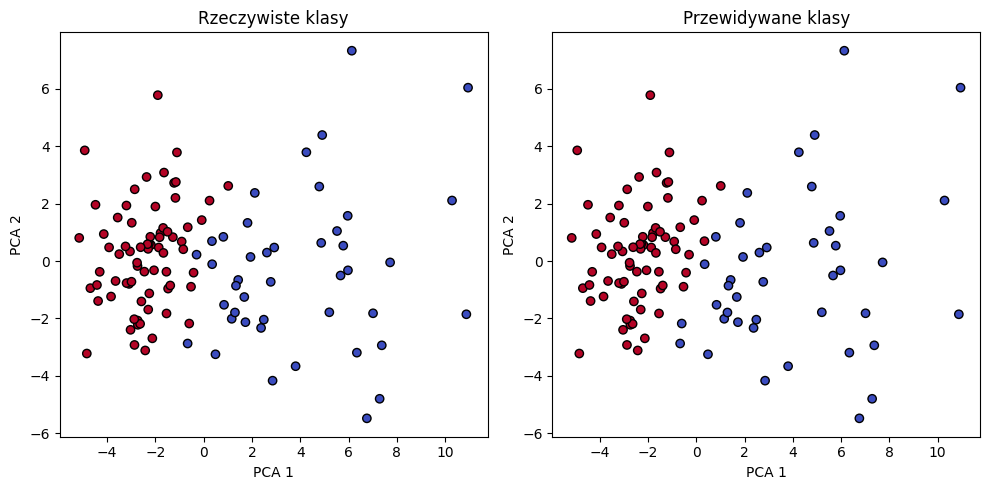

In [9]:
#wizualizujemy
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Redukcja wymiarów do 2D dla wizualizacji
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_test)

# Wykres punktów testowych z kolorami wg prawdziwej klasy
plt.figure(figsize=(10, 5))

# Prawdziwe klasy
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_test, cmap='coolwarm', edgecolors='k')
plt.title("Rzeczywiste klasy")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")

# Predykcje modelu
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred, cmap='coolwarm', edgecolors='k')
plt.title("Przewidywane klasy")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")

plt.tight_layout()
plt.show()

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score, recall_score, roc_auc_score

y_pred_logreg = logistic_regression.predict(X_test)

# KNN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

def print_metrics(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    spec = tn / (tn + fp)
    print(f"\nMetryki dla {model_name}:")
    print(f"Dokładność:    {acc:.2f}")
    print(f"Precyzja:      {prec:.2f}")
    print(f"Czułość (TPR): {rec:.2f}")
    print(f"Specyficzność: {spec:.2f}")

print_metrics(y_test, y_pred_logreg, "Regresja logistyczna")
print_metrics(y_test, y_pred_knn, "KNN")
print_metrics(y_test, y_pred_svm, "SVM")


Metryki dla Regresja logistyczna:
Dokładność:    0.97
Precyzja:      0.97
Czułość (TPR): 0.99
Specyficzność: 0.95

Metryki dla KNN:
Dokładność:    0.95
Precyzja:      0.96
Czułość (TPR): 0.96
Specyficzność: 0.93

Metryki dla SVM:
Dokładność:    0.98
Precyzja:      0.97
Czułość (TPR): 1.00
Specyficzność: 0.95


Lepiej sprawdza sie SVM do tych danych, gorzej natomiast KNN

In [36]:
#zadanie3
from sklearn.datasets import load_digits
import numpy as np
print("Zadanie 3\n")

digits = load_digits()
X = digits.data        # obrazy spłaszczone (n_samples x 64)
y = digits.target

print("Rozmiar ", X.shape)
print("Unikalne etykiety:", np.unique(y))


Zadanie 3

Rozmiar  (1797, 64)
Unikalne etykiety: [0 1 2 3 4 5 6 7 8 9]


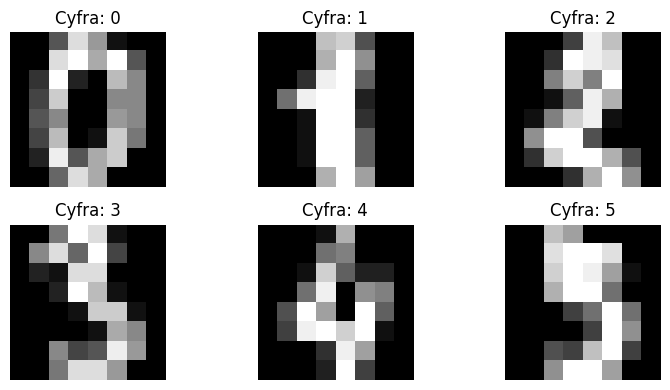

In [37]:
#sprawdzam wygląd
plt.figure(figsize=(8, 4))
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(digits.images[i], cmap='gray')
    plt.title(f'Cyfra: {digits.target[i]}')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [43]:
from sklearn.preprocessing import StandardScaler
#obrazy są już spłaszczone jednak zgodnie z poleceniem 
X_flat = digits.images.reshape((len(digits.images), -1))
#standaryzuje wartość pikseli

scaler = StandardScaler()
X_skalowane = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_skalowane, y, test_size=0.2, random_state=42) 
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

Dokładność: 0.9806


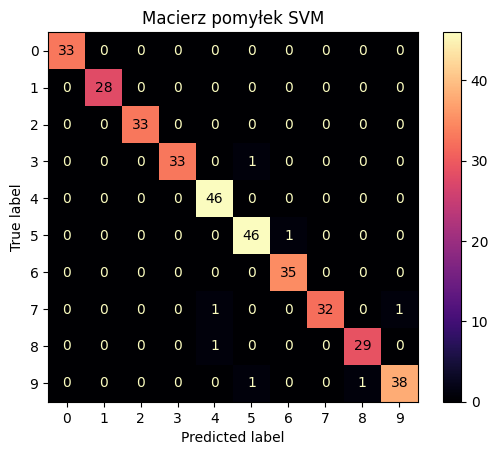

Najczęstsza pomyłka: cyfra 3 zinterpretowana jako 5


In [60]:
from sklearn.metrics import ConfusionMatrixDisplay

print(f"Dokładność: {accuracy_score(y_test, y_pred):.4f}")
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=digits.target_names)
disp.plot(cmap='magma', values_format='d')
plt.title("Macierz pomyłek SVM")
plt.show()

cm_copy = cm.copy()
np.fill_diagonal(cm_copy, 0)
most_confused = np.unravel_index(np.argmax(cm_copy), cm_copy.shape)
print(f"Najczęstsza pomyłka: cyfra {most_confused[0]} zinterpretowana jako {most_confused[1]}")

In [93]:
#zadanie 4
import pandas as pd
print("Zadanie 4\n")

file_path = "C:/Users/Magda/PycharmProjects/sem4/mndbd/dane_do_zadań/Titanic-Dataset.csv"
titanic_df = pd.read_csv(file_path)

print(titanic_df.head())


Zadanie 4

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN   

In [94]:
titanic_df.describe(include='all')


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [95]:
has_na = titanic_df.isnull().any()
na_suma = titanic_df.isnull().sum()
print("Czy są wartości puste?\n", has_na)
print("\nLiczba pustych wartości\n", na_suma)

Czy są wartości puste?
 PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

Liczba pustych wartości
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Ponieważ wystąpiły miejsca z pustymi danymi to zajmiemy się nimi w następujący sposób:
-nie będziemy się zajmować numerem kajuty więc usuniemy kolumnę-ma ona duże braki
-wiek natomiast zastąpimy średnią pasażerów
-Port wejścia na pokład z powodu braku tylko w dwóch miejscach zajmiemy najczęściej występującą daną

In [96]:
#uzupełnienie wieku średnią
titanic_df['Age'] = titanic_df['Age'].fillna(titanic_df['Age'].mean())

#uzupełnienie portu wejścia najczęstszą wartością
titanic_df['Embarked'] = titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0])

#usunięcie kolumny Cabin
titanic_df = titanic_df.drop(columns=['Cabin'])


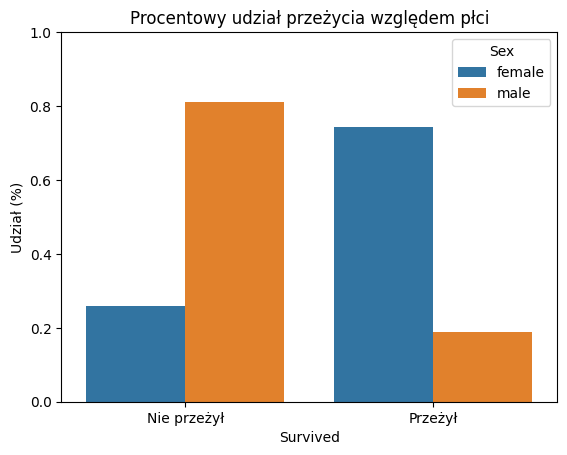

In [97]:
#sprawdzamy cechy a przezycie
import seaborn as sns
# Obliczamy procenty
df_percent = (
    titanic_df.groupby('Sex')['Survived']
    .value_counts(normalize=True)
    .rename('proportion')
    .reset_index()
)

# Wykres
sns.barplot(data=df_percent, x='Survived', y='proportion', hue='Sex')
plt.title('Procentowy udział przeżycia względem płci')
plt.ylabel('Udział (%)')
plt.xticks([0, 1], ['Nie przeżył', 'Przeżył'])
plt.ylim(0, 1)
plt.show()


In [98]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
#usuwamy kolumny których nie będziemy potrzebować
X = titanic_df.drop(columns=['Survived', 'Name', 'Ticket', 'PassengerId'])

# 2. Zmienna docelowa
y = titanic_df['Survived']

# 3. Podział na zbiory
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Kategoryczne kolumny do zakodowania
cat_features = ['Sex', 'Embarked', 'Pclass']
# 5. Transformer: OneHotEncoder dla kategorii
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), cat_features)
    ],
    remainder='passthrough'  # inne kolumny (np. Age, Fare, itd.) zostają
)

model = make_pipeline(preprocessor, LogisticRegression(max_iter=1000))
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

print("Raport klasyfikacji:\n", classification_report(y_test, y_pred))
print("Macierz pomyłek:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC:", round(roc_auc_score(y_test, y_prob), 3))


Raport klasyfikacji:
               precision    recall  f1-score   support

           0       0.81      0.87      0.84       105
           1       0.79      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179

Macierz pomyłek:
 [[91 14]
 [21 53]]
ROC AUC: 0.876


In [99]:
from sklearn.tree import DecisionTreeClassifier

tree_model = make_pipeline(preprocessor, DecisionTreeClassifier(max_depth=5, random_state=42))
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)
y_prob_tree = tree_model.predict_proba(X_test)[:, 1]

print("Drzewo decyzyjne – ROC AUC:", round(roc_auc_score(y_test, y_prob_tree), 3))
print("Drzewo decyzyjne – klasyfikacja:\n", classification_report(y_test, y_pred_tree))


Drzewo decyzyjne – ROC AUC: 0.848
Drzewo decyzyjne – klasyfikacja:
               precision    recall  f1-score   support

           0       0.78      0.90      0.84       105
           1       0.82      0.64      0.72        74

    accuracy                           0.79       179
   macro avg       0.80      0.77      0.78       179
weighted avg       0.80      0.79      0.79       179



Regresja logistyczna osiągnęła lepszy recall - lepiej rozpoznaje osoby, które przeżyły, natomiast drzewo decyzyjne nieco lepiej przewiduje osoby, które nie przeżyły-lepsza precyzja

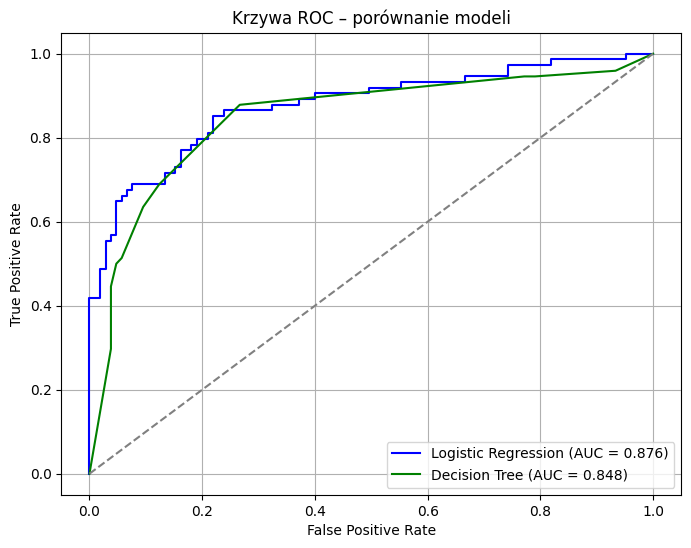

In [100]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

#krzywa ROC – regresja logistyczna
fpr_log, tpr_log, _ = roc_curve(y_test, y_prob)
roc_auc_log = auc(fpr_log, tpr_log)

#krzywa ROC – drzewo decyzyjne
fpr_tree, tpr_tree, _ = roc_curve(y_test, y_prob_tree)
roc_auc_tree = auc(fpr_tree, tpr_tree)

plt.figure(figsize=(8, 6))
plt.plot(fpr_log, tpr_log, color='blue', label=f'Logistic Regression (AUC = {roc_auc_log:.3f})')
plt.plot(fpr_tree, tpr_tree, color='green', label=f'Decision Tree (AUC = {roc_auc_tree:.3f})')

plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Krzywa ROC – porównanie modeli')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [102]:
#jak dane cechy potencjalnie wpływają na przeżycie
coefficients = model.named_steps['logisticregression'].coef_[0]
feature_names = model.named_steps['columntransformer'].get_feature_names_out()

coef_df = pd.DataFrame({
    'Cecha': feature_names,
    'Współczynnik': coefficients
})
coef_df['Wpływ'] = coef_df['Współczynnik'].apply(
    lambda x: 'Zwiększa szansę na przeżycie' if x > 0 else 'Zmniejsza szansę na przeżycie'
)

coef_df = coef_df.sort_values(by='Współczynnik', ascending=False)

print(coef_df)

              Cecha  Współczynnik                          Wpływ
8   remainder__Fare      0.004234   Zwiększa szansę na przeżycie
5    remainder__Age     -0.028672  Zmniejsza szansę na przeżycie
1   cat__Embarked_Q     -0.110034  Zmniejsza szansę na przeżycie
7  remainder__Parch     -0.129090  Zmniejsza szansę na przeżycie
6  remainder__SibSp     -0.291844  Zmniejsza szansę na przeżycie
3     cat__Pclass_2     -0.384992  Zmniejsza szansę na przeżycie
2   cat__Embarked_S     -0.463171  Zmniejsza szansę na przeżycie
4     cat__Pclass_3     -1.596602  Zmniejsza szansę na przeżycie
0     cat__Sex_male     -2.568237  Zmniejsza szansę na przeżycie


In [109]:
#zadanie5
print("Zadanie 5\n")
df = pd.read_csv('C:/Users/Magda/PycharmProjects/sem4/mndbd/dane_do_zadań/heart_failure_clinical_records_dataset.csv')

print(df.head())
print(df.describe())

Zadanie 5

    age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1

DEATH_EVENT
0    203
1     96
Name: count, dtype: int64


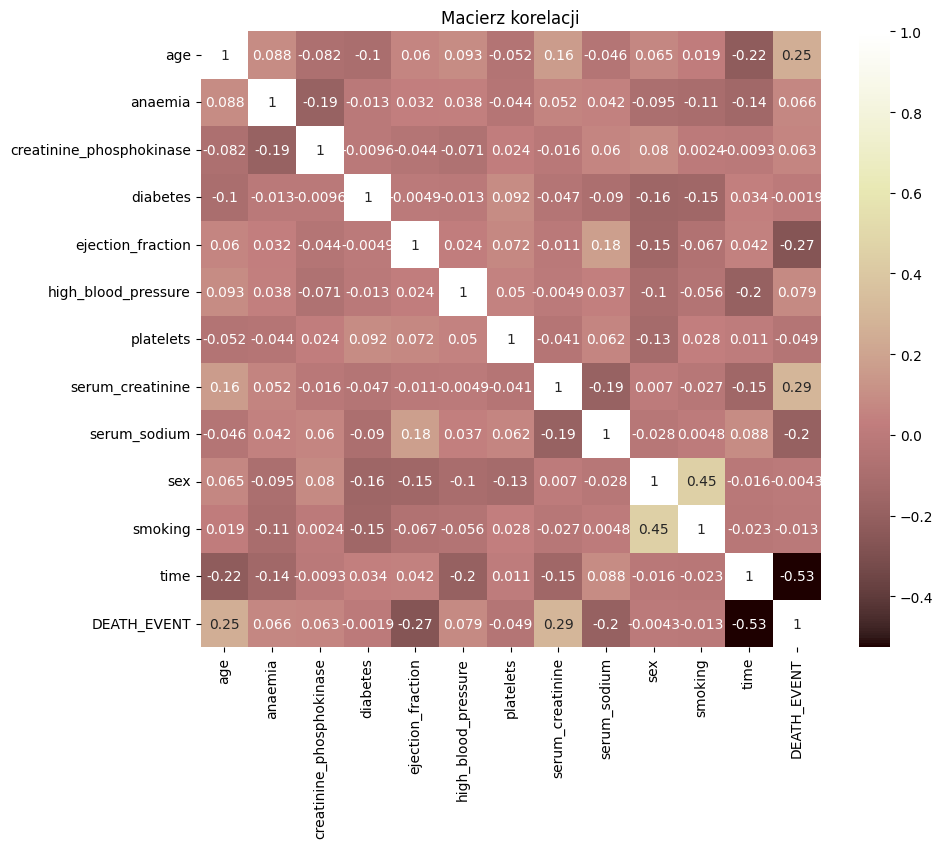

In [118]:
print(df['DEATH_EVENT'].value_counts())
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='pink')
plt.title("Macierz korelacji")
plt.show()

DEATH_EVENT = 1 → pacjent zmarł

DEATH_EVENT = 0 → pacjent przeżył

In [120]:
X = df.drop('DEATH_EVENT', axis=1)
y = df['DEATH_EVENT']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [121]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Model SVM z prawdopodobieństwem
svm_model = SVC(kernel='rbf', probability=True, random_state=42)
svm_model.fit(X_train, y_train)

# Predykcje
y_pred = svm_model.predict(X_test)
y_prob = svm_model.predict_proba(X_test)[:, 1]

# Ocena
print("Raport klasyfikacji:\n", classification_report(y_test, y_pred))
print("Macierz pomyłek:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC:", round(roc_auc_score(y_test, y_prob), 3))

Raport klasyfikacji:
               precision    recall  f1-score   support

           0       0.78      0.93      0.84        41
           1       0.73      0.42      0.53        19

    accuracy                           0.77        60
   macro avg       0.75      0.67      0.69        60
weighted avg       0.76      0.77      0.75        60

Macierz pomyłek:
 [[38  3]
 [11  8]]
ROC AUC: 0.845
